# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

<font color='red'> Importing packages</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import math

<font color='red'>Creating custom dataset</font>

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# You can check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [4]:
#please don't change random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
# Standardizing the data.
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier</font>

In [7]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [8]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.07 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.08 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [9]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))



## <font color='red' size=5> Implementing Logistic Regression with L2 regularization Using SGD: without using sklearn </font>




<br>

* Initializing the weight_vector and intercept term to zeros (Code written in <font color='blue'>def initialize_weights()</font>)

* Created a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (kept batch size=1)

        - Calculated the gradient of loss function w.r.t each weight in weight vector (Code written in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculated the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Updated weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - Calculated the log loss for train and test with the updated weights
    - Appended this loss in the list


<font color='blue'>Initialize weights </font>

In [11]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #used zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialized bias to zero
    w = np.zeros(len(dim))
    b=0

    return w,b

In [12]:
dim=X_train[0]
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [14]:
x = 1/(1+math.exp(-2))
x

0.8807970779778823

In [15]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # computed sigmoid(z) and return
    s = 1/(1+math.exp(-z))

    return s

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [17]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    sum=0
    for i in range(len(y_true)):
        sum=sum+((y_true[i]*math.log(y_pred[i],10)) + ((1-y_true[i])*math.log((1-y_pred[i]),10)))
    
    loss = -1*(1/len(y_true))*sum
    return loss

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [19]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = x*(y-sigmoid(w@x + b)) - (alpha/N)*w

    return dw

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [21]:
 def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     db = y - sigmoid(w@x + b)

     return db

<font color='blue'> Implementing logistic regression</font>

In [23]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implementing the code as follows
    # initalizing the weights (call the initialize_weights(X_train[0]) function)
    train_loss_list = []
    test_loss_list = []
    grad_w,grad_b=initialize_weights(X_train[0])
    # for every epoch
    for i in range(epochs):
        # for every data point(X_train,y_train)
        for j in range(len(X_train)):
           #computing gradient w.r.to w (call the gradient_dw() function)
           grad_dw=gradient_dw(X_train[j],y_train[j],grad_w,grad_b,alpha,N)
           #computing gradient w.r.to b (call the gradient_db() function)
           grad_db=gradient_db(X_train[j],y_train[j],grad_w,grad_b)
           #update w, b
           grad_w = grad_w + eta0*grad_dw
           grad_b = grad_b + eta0*grad_db

        # predicting the output of x_train[for all data points in X_train] using w,b
        y_pred_train = X_train.dot(grad_w) + grad_b
        y_pred_train = np.array([0.1 if sigmoid(i)>=0 and sigmoid(i)<0.1 else round(sigmoid(i),1) for i in y_pred_train])
        for i in range(len(y_pred_train)):
            if(y_pred_train[i] == 1):
                y_pred_train[i] =0.9  #while calculating log-loss log(1) = 0, & log(1-1) = log(0) = infinite. 
        #y_pred_train = [0 if i<0.5 else 1 for i in y_pred_train]
        #computing the loss between predicted and actual values (call the loss function)
        loss = logloss(y_train,y_pred_train)
        # storing all the train loss values in a list
        train_loss_list.append(loss)
        # predicting the output of x_test[for all data points in X_test] using w,b
        y_pred_test = X_test@grad_w + grad_b
        y_pred_test = np.array([0.1 if sigmoid(i)>=0 and sigmoid(i)<0.1 else round(sigmoid(i),1) for i in y_pred_test])
        for i in range(len(y_pred_test)):
            if(y_pred_test[i] == 1):
                y_pred_test[i] =0.9
        #computing the loss between predicted and actual values (call the loss function)
        loss = logloss(y_test,y_pred_test)
        # storing all the test loss values in a list
        test_loss_list.append(loss)
        
    return grad_w,grad_b,train_loss_list,test_loss_list

In [24]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

<font color='red'>Goal of Project</font>

Comparing my implementation and SGDClassifier's weights and intercept, making sure they are as close as possible i.e difference should be in terms of 10^-3

In [25]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[-0.00642552,  0.00755955,  0.00012041, -0.00335043, -0.01309563,
          0.00978314,  0.00724319,  0.00418409,  0.0125563 , -0.00701162,
          0.00169655, -0.00480346, -0.00173041,  0.00056208,  0.00032075]]),
 array([-0.03911387]))

<font color='blue'>Plot epoch number vs train , test loss </font>

* epoch number on X-axis
* loss on Y-axis

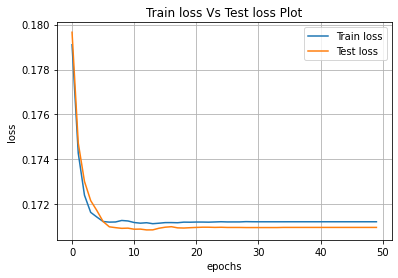

In [26]:
import matplotlib.pyplot as plt
epochs = np.arange(50)
plt.plot(epochs, train_loss, label='Train loss')
plt.plot(epochs, test_loss, label='Test loss')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Train loss Vs Test loss Plot")
plt.grid()
plt.show()

In [27]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9522133333333334
0.95
